In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [8]:
data = {
    "JD": [
        "Looking for a Python developer with experience in ML and AWS.",
        "Need a frontend developer skilled in React and JavaScript.",
        "Hiring data analyst with SQL and Excel expertise.",
        "Looking for a Java backend engineer familiar with Spring Boot.",
        "We need a cloud engineer with AWS and Docker knowledge.",
        "Looking for a digital marketing specialist with SEO and SEM skills.",
        "Recruiting a content writer with experience in blogs and articles.",
        "Need a project manager with Agile and Scrum expertise.",
        "Hiring UI/UX designer with Figma and Adobe XD experience.",
        "Looking for cybersecurity analyst with penetration testing skills."
    ],
    "Resume": [
        "Experienced Python engineer skilled in ML, cloud computing, and AWS.",
        "Frontend developer with strong React, JavaScript, and UI design skills.",
        "Graphic designer with Photoshop and Illustrator skills.",
        "Backend engineer with Java, Spring Boot, and database knowledge.",
        "Cloud computing expert with AWS, Docker, and Kubernetes experience.",
        "Marketing professional skilled in SEO, SEM, and Google Ads.",
        "Creative content writer with blogging and article writing experience.",
        "Certified project manager with Agile and Scrum certifications.",
        "Designer experienced in UI/UX, Figma, and Adobe XD.",
        "Mechanical engineer with CAD and SolidWorks expertise."
    ],
    "Label": [1,1,0,1,1,1,1,1,1,0]
}

df = pd.DataFrame(data)


In [7]:
df.head()

,JD,Resume,Label
0,Looking for a Python developer with experience...,"Experienced Python engineer skilled in ML, clo...",1
1,Need a frontend developer skilled in React and...,"Frontend developer with strong React, JavaScri...",1
2,Hiring data analyst with SQL and Excel expertise.,Graphic designer with Photoshop and Illustrato...,0
3,Looking for a Java backend engineer familiar w...,"Backend engineer with Java, Spring Boot, and d...",1
4,We need a cloud engineer with AWS and Docker k...,"Cloud computing expert with AWS, Docker, and K...",1


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['JD_clean'] = df['JD'].apply(clean_text)
df['Resume_clean'] = df['Resume'].apply(clean_text)
df['Combined'] = df['JD_clean'] + " " + df['Resume_clean']

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Combined'])
y = df['Label']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


([<matplotlib.axis.YTick at 0xa83bdb8>, <matplotlib.axis.YTick at 0xaa2c7f8>],
 [Text(0, 0, 'No Match'), Text(0, 1, 'Match')])

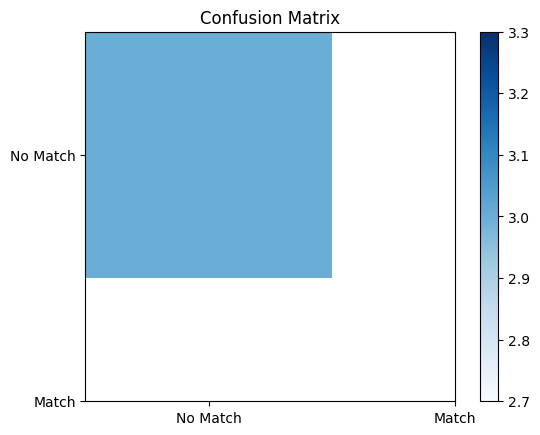

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["No Match", "Match"])
plt.yticks([0,1], ["No Match", "Match"])

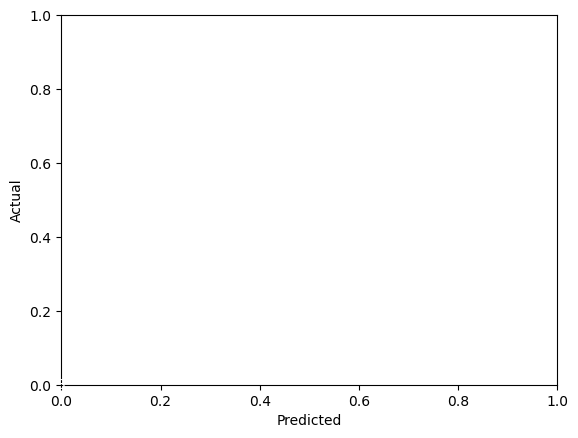

In [15]:
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
new_data = [
    ("Looking for a Python ML engineer.", "Python developer with ML and data science experience."),
    ("Hiring a graphic designer skilled in Photoshop.", "Frontend developer with React and JavaScript.")
]

new_df = pd.DataFrame(new_data, columns=["JD", "Resume"])
new_df["JD_clean"] = new_df["JD"].apply(clean_text)
new_df["Resume_clean"] = new_df["Resume"].apply(clean_text)
new_df["Combined"] = new_df["JD_clean"] + " " + new_df["Resume_clean"]

X_new = vectorizer.transform(new_df["Combined"])
predictions = model.predict(X_new)

for i, pred in enumerate(predictions):
    print(f"JD: {new_df['JD'][i]}")
    print(f"Resume: {new_df['Resume'][i]}")
    print("Prediction:", "Match " if pred==1 else "No Match ")
    

JD: Looking for a Python ML engineer.
Resume: Python developer with ML and data science experience.
Prediction: Match 
JD: Hiring a graphic designer skilled in Photoshop.
Resume: Frontend developer with React and JavaScript.
Prediction: Match 
